In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import os

In [2]:
os.chdir('D:\Reg ')

In [3]:
data = pd.read_csv('framingham.csv')

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.shape

(4240, 16)

In [7]:
#creating a copy of orginal data
data1 = data.copy()

In [8]:
# eda

In [10]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


In [11]:
data1.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [18]:
data1 = data1.apply(lambda x : x.fillna(x.mean())
                              if x.dtype =='int' else
                              x.fillna(x.value_counts().index[0]))

In [16]:
data1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
data1_con = data1[['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','cigsPerDay']]

In [26]:
# subset the categorical variables
data1_nom = data1[['male', 'age', 'education', 'currentSmoker', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes' ]]

In [28]:
print(np.unique(data1_nom))

[0.00000000e+00 2.96154765e-02 1.00000000e+00 1.97944377e+00
 2.00000000e+00 3.00000000e+00 4.00000000e+00 3.20000000e+01
 3.30000000e+01 3.40000000e+01 3.50000000e+01 3.60000000e+01
 3.70000000e+01 3.80000000e+01 3.90000000e+01 4.00000000e+01
 4.10000000e+01 4.20000000e+01 4.30000000e+01 4.40000000e+01
 4.50000000e+01 4.60000000e+01 4.70000000e+01 4.80000000e+01
 4.90000000e+01 5.00000000e+01 5.10000000e+01 5.20000000e+01
 5.30000000e+01 5.40000000e+01 5.50000000e+01 5.60000000e+01
 5.70000000e+01 5.80000000e+01 5.90000000e+01 6.00000000e+01
 6.10000000e+01 6.20000000e+01 6.30000000e+01 6.40000000e+01
 6.50000000e+01 6.60000000e+01 6.70000000e+01 6.80000000e+01
 6.90000000e+01 7.00000000e+01]


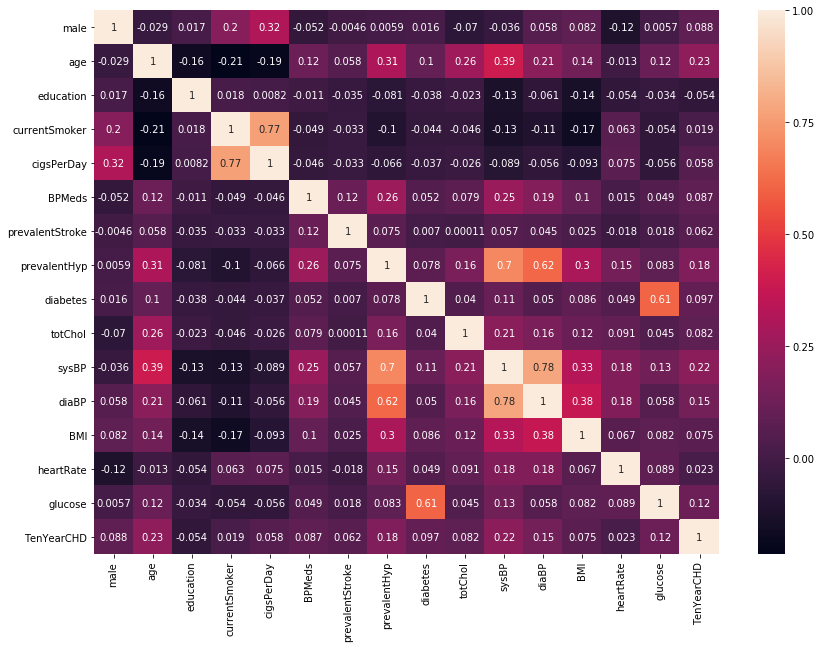

In [29]:
# adjust the width and height of the figure
plt.figure(figsize=(14,10))

# create a heatmap of correlation matrix
correlation_matrix = data1.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

C:\Users\Aspire\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


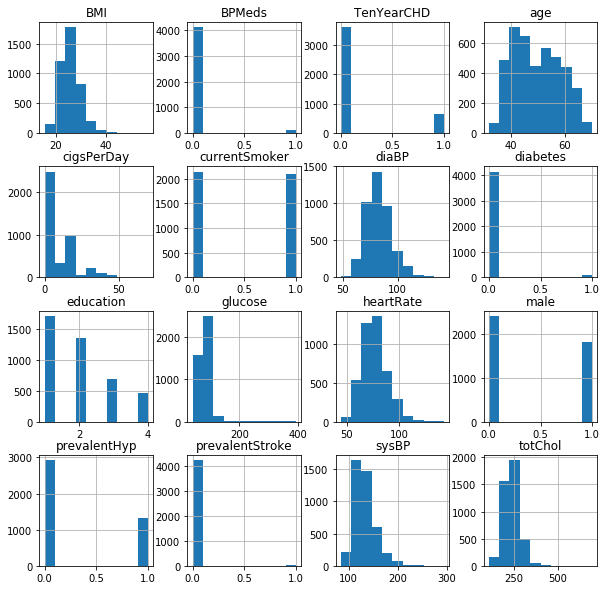

In [31]:
fig = plt.figure(figsize = (10,10))
# gca - get current axis
ax = fig.gca()
data1.hist(ax = ax)
plt.show()

In [33]:
data1.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [37]:
age_diabetes = pd.crosstab(index = data1['age'],columns = data1['diabetes'],margins = True,normalize = 'index')

In [38]:
print(age_diabetes)

diabetes         0         1
age                         
32        1.000000  0.000000
33        1.000000  0.000000
34        1.000000  0.000000
35        1.000000  0.000000
36        0.988095  0.011905
37        1.000000  0.000000
38        1.000000  0.000000
39        0.988235  0.011765
40        0.994792  0.005208
41        0.994253  0.005747
42        1.000000  0.000000
43        0.987421  0.012579
44        0.975904  0.024096
45        0.987654  0.012346
46        0.989011  0.010989
47        0.936170  0.063830
48        0.982659  0.017341
49        0.992424  0.007576
50        0.964286  0.035714
51        1.000000  0.000000
52        0.932886  0.067114
53        0.971223  0.028777
54        0.969697  0.030303
55        0.965517  0.034483
56        0.975610  0.024390
57        0.967480  0.032520
58        0.948718  0.051282
59        0.974790  0.025210
60        0.963964  0.036036
61        0.963636  0.036364
62        0.909091  0.090909
63        0.945455  0.054545
64        0.96

In [39]:
prehps_prehpt = pd.crosstab(index = data1['prevalentStroke'],columns = data1['prevalentHyp'],margins = True,normalize = 'index')

In [40]:
print(prehps_prehpt)#only 30 percent people are having both stroke and hypertension problem

prevalentHyp            0         1
prevalentStroke                    
0                0.692052  0.307948
1                0.240000  0.760000
All              0.689387  0.310613


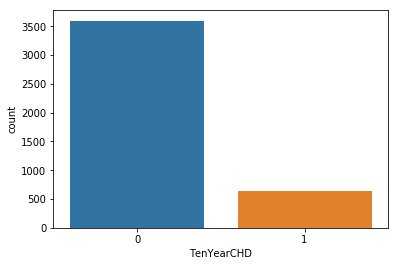

In [41]:
# check the count of each category in dependent variable
sns.countplot(x='TenYearCHD',data=data)
plt.show()

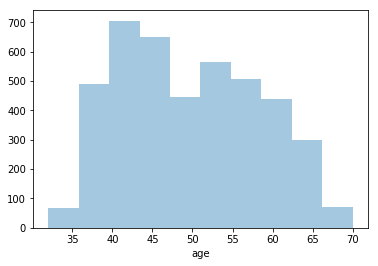

In [42]:
sns.distplot(data1['age'],bins = 10,kde = False)#between 40 to 45 age frequency is higher

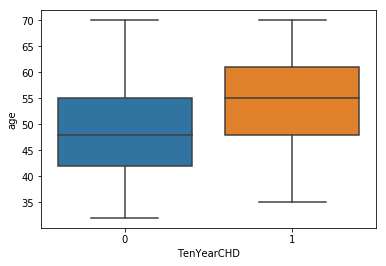

In [43]:
sns.boxplot('TenYearCHD','age',data = data1)

In [44]:
data1.groupby('TenYearCHD')['age'].median()

TenYearCHD
0    48
1    55
Name: age, dtype: int64

In [45]:
#people with age 45 to 55 had more chance of thd

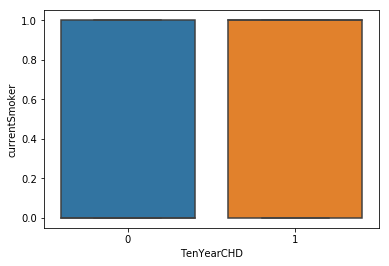

In [47]:
sns.boxplot('TenYearCHD','currentSmoker',data = data1)

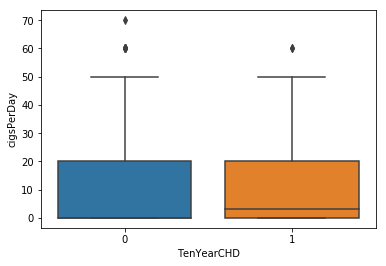

In [48]:
sns.boxplot('TenYearCHD','cigsPerDay',data = data1)

In [49]:
data1.groupby('TenYearCHD')['cigsPerDay'].median()

TenYearCHD
0    0.0
1    3.0
Name: cigsPerDay, dtype: float64

In [52]:
#even 3 cigs per day can lead to thd

In [53]:
thd_education = pd.crosstab(index = data1['education'],columns = data1['TenYearCHD'],margins = True,normalize = 'index')

In [54]:
print(thd_education) #mostly those who are educated had less chance of thd

TenYearCHD                 0         1
education                             
1.0                 0.812209  0.187791
1.9794437726723095  0.847619  0.152381
2.0                 0.882682  0.117318
3.0                 0.872279  0.127721
4.0                 0.852008  0.147992
All                 0.848113  0.151887


In [55]:
thd_diabetes = pd.crosstab(index = data1['diabetes'],columns = data1['TenYearCHD'],margins = True,normalize = 'index')

In [56]:
print(thd_diabetes)

TenYearCHD         0         1
diabetes                      
0           0.853788  0.146212
1           0.633028  0.366972
All         0.848113  0.151887


In [57]:
X_dup = data1[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
Y_dup = data1['TenYearCHD']

In [58]:
from statsmodels.tools import add_constant as add_constant
X_dup = add_constant(X_dup)
X_dup.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [59]:
from sklearn.model_selection import train_test_split
x_train_dup,x_test_dup,y_train_dup,y_test_dup=train_test_split(X_dup,Y_dup,test_size=.20,random_state=1)

In [61]:
import statsmodels.api as sm
model=sm.Logit(y_train_dup,x_train_dup)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.379011
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3376
Method:                           MLE   Df Model:                           15
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1090
Time:                        18:52:25   Log-Likelihood:                -1285.6
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 5.583e-58
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0344      0.743    -10.815      0.000      -9.491      -6.578
male                0.6016      0.112      5.378      0.000       0.382       0.821
age                 0.0555      0.007      7.953      0.000       0.042       0.069
education           0.0006      0.052      0.011      0.991      -0.101       0.102
currentSmoker       0.0073      0.160      0.046      0.963      -0.306       0.321
cigsPerDay          0.0211      0.006      3.376      0.001       0.009       0.033
BPMeds              0.3355      0.240      1.399      0.162      -0.135       0.806
prevalentStroke     0.2853      0.586      0.487      0.626      -0.863       1.434
prevalentHyp        0.2395      0.144      1.659      0.097      -0.043       0.522
diabetes            0.1862      0.322      0.578      0.563      -0.445       0.817
totChol             0.0020      0.001      1.724      0.085      -0.000       0.004
sysBP               0.0159      0.004      4.002      0.000       0.008       0.024
diaBP              -0.0063      0.007     -0.949      0.343      -0.019       0.007
BMI                 0.0067      0.013      0.502      0.616      -0.019       0.033
heartRate          -0.0003      0.004     -0.072      0.943      -0.009       0.008
glucose             0.0071      0.002      2.917      0.004       0.002       0.012
===================================================================================
"""

In [62]:
y_pred=result.predict(x_test_dup)
y_pred.head()

534     0.075506
2751    0.104347
3599    0.159366
518     0.087470
3813    0.050588
dtype: float64

In [64]:
# set up a threshold and convert the probabilities to 0 or 1
import sklearn
y_pred=pd.Series(np.where(y_pred < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup,y_pred)

0.8490566037735849

In [65]:
X_dup1 = X_dup[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'glucose']]
Y_dup1 = Y_dup
X_dup1 = add_constant(X_dup1)

In [66]:
from sklearn.model_selection import train_test_split
x_train_dup1,x_test_dup1,y_train_dup1,y_test_dup1=train_test_split(X_dup1,Y_dup1,test_size=.20,random_state=1)

In [67]:
model1=sm.Logit(y_train_dup1,x_train_dup1)
result1=model1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.379012
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3377
Method:                           MLE   Df Model:                           14
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1090
Time:                        19:00:03   Log-Likelihood:                -1285.6
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 1.156e-58
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0534      0.694    -11.603      0.000      -9.414      -6.693
male                0.6027      0.111      5.440      0.000       0.386       0.820
age                 0.0556      0.007      7.975      0.000       0.042       0.069
education           0.0007      0.052      0.014      0.989      -0.100       0.102
currentSmoker       0.0070      0.160      0.044      0.965      -0.307       0.320
cigsPerDay          0.0210      0.006      3.380      0.001       0.009       0.033
BPMeds              0.3360      0.240      1.402      0.161      -0.134       0.806
prevalentStroke     0.2867      0.586      0.490      0.624      -0.861       1.435
prevalentHyp        0.2388      0.144      1.658      0.097      -0.044       0.521
diabetes            0.1863      0.322      0.579      0.563      -0.445       0.817
totChol             0.0019      0.001      1.723      0.085      -0.000       0.004
sysBP               0.0159      0.004      4.004      0.000       0.008       0.024
diaBP              -0.0064      0.007     -0.954      0.340      -0.019       0.007
BMI                 0.0067      0.013      0.503      0.615      -0.019       0.033
glucose             0.0071      0.002      2.920      0.003       0.002       0.012
===================================================================================
"""

In [68]:
thd_prest = pd.crosstab(index = data1['prevalentStroke'],columns = data1['TenYearCHD'],margins = True,normalize = 'index')

In [69]:
print(thd_prest)

TenYearCHD              0         1
prevalentStroke                    
0                0.849822  0.150178
1                0.560000  0.440000
All              0.848113  0.151887


In [70]:
thd_prehy = pd.crosstab(index = data1['prevalentHyp'],columns = data1['TenYearCHD'],margins = True,normalize = 'index')

In [71]:
print(thd_prehy)

TenYearCHD           0         1
prevalentHyp                    
0             0.890866  0.109134
1             0.753227  0.246773
All           0.848113  0.151887


In [72]:
y_pred1=result1.predict(x_test_dup1)
y_pred1.head()
y_pred1=pd.Series(np.where(y_pred1 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup1,y_pred1)

0.8502358490566038

In [74]:
X_dup2 = X_dup1[['const','male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP',
       'diaBP', 'BMI','glucose']]
Y_dup2 = Y_dup1

In [75]:
from sklearn.model_selection import train_test_split
x_train_dup2,x_test_dup2,y_train_dup2,y_test_dup2=train_test_split(X_dup2,Y_dup2,test_size=.20,random_state=1)

In [76]:
model2=sm.Logit(y_train_dup2,x_train_dup2)
result2=model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.379060
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3378
Method:                           MLE   Df Model:                           13
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1088
Time:                        19:07:35   Log-Likelihood:                -1285.8
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 2.695e-59
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1284      0.682    -11.916      0.000      -9.465      -6.791
male                0.6034      0.111      5.448      0.000       0.386       0.821
age                 0.0556      0.007      7.985      0.000       0.042       0.069
education           0.0007      0.052      0.014      0.989      -0.100       0.102
currentSmoker       0.0061      0.160      0.038      0.970      -0.307       0.319
cigsPerDay          0.0210      0.006      3.382      0.001       0.009       0.033
BPMeds              0.3390      0.240      1.415      0.157      -0.131       0.809
prevalentStroke     0.2791      0.585      0.477      0.634      -0.868       1.427
prevalentHyp        0.2405      0.144      1.670      0.095      -0.042       0.523
totChol             0.0020      0.001      1.725      0.085      -0.000       0.004
sysBP               0.0159      0.004      4.022      0.000       0.008       0.024
diaBP              -0.0065      0.007     -0.981      0.326      -0.020       0.007
BMI                 0.0071      0.013      0.535      0.593      -0.019       0.033
glucose             0.0079      0.002      4.168      0.000       0.004       0.012
===================================================================================
"""

In [77]:
y_pred2=result2.predict(x_test_dup2)
y_pred2.head()
y_pred2=pd.Series(np.where(y_pred2 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup2,y_pred2)

0.8490566037735849

In [78]:
X_dup3 = X_dup2[['const','male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP', 'BMI','glucose']]
Y_dup3 = Y_dup1

In [79]:
from sklearn.model_selection import train_test_split
x_train_dup3,x_test_dup3,y_train_dup3,y_test_dup3=train_test_split(X_dup3,Y_dup3,test_size=.20,random_state=1)

In [80]:
model3=sm.Logit(y_train_dup3,x_train_dup3)
result3=model3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.379202
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3379
Method:                           MLE   Df Model:                           12
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1085
Time:                        19:08:52   Log-Likelihood:                -1286.3
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 8.190e-60
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3490      0.646    -12.934      0.000      -9.614      -7.084
male                0.5902      0.110      5.371      0.000       0.375       0.806
age                 0.0571      0.007      8.373      0.000       0.044       0.070
education          -0.0031      0.051     -0.059      0.953      -0.104       0.098
currentSmoker       0.0094      0.160      0.059      0.953      -0.304       0.323
cigsPerDay          0.0211      0.006      3.393      0.001       0.009       0.033
BPMeds              0.3412      0.239      1.427      0.154      -0.127       0.810
prevalentStroke     0.2763      0.585      0.472      0.637      -0.870       1.422
prevalentHyp        0.2201      0.142      1.546      0.122      -0.059       0.499
totChol             0.0019      0.001      1.720      0.085      -0.000       0.004
sysBP               0.0135      0.003      4.371      0.000       0.007       0.020
BMI                 0.0047      0.013      0.359      0.720      -0.021       0.030
glucose             0.0080      0.002      4.233      0.000       0.004       0.012
===================================================================================
"""

In [81]:
y_pred3=result3.predict(x_test_dup3)
y_pred3.head()
y_pred3=pd.Series(np.where(y_pred3 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup3,y_pred3)

0.847877358490566

In [82]:
X_dup4 = X_dup3[['const','male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP','glucose']]
Y_dup4 = Y_dup1

In [83]:
from sklearn.model_selection import train_test_split
x_train_dup4,x_test_dup4,y_train_dup4,y_test_dup4=train_test_split(X_dup4,Y_dup4,test_size=.20,random_state=1)

In [84]:
model4=sm.Logit(y_train_dup4,x_train_dup4)
result4=model4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.379221
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3380
Method:                           MLE   Df Model:                           11
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1085
Time:                        19:09:53   Log-Likelihood:                -1286.3
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 1.592e-60
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2411      0.570    -14.446      0.000      -9.359      -7.123
male                0.5929      0.110      5.408      0.000       0.378       0.808
age                 0.0569      0.007      8.368      0.000       0.044       0.070
education          -0.0051      0.051     -0.099      0.921      -0.105       0.095
currentSmoker       0.0020      0.159      0.013      0.990      -0.309       0.313
cigsPerDay          0.0212      0.006      3.406      0.001       0.009       0.033
BPMeds              0.3428      0.239      1.434      0.152      -0.126       0.811
prevalentStroke     0.2814      0.584      0.482      0.630      -0.863       1.425
prevalentHyp        0.2244      0.142      1.581      0.114      -0.054       0.503
totChol             0.0020      0.001      1.732      0.083      -0.000       0.004
sysBP               0.0136      0.003      4.472      0.000       0.008       0.020
glucose             0.0081      0.002      4.242      0.000       0.004       0.012
===================================================================================
"""

In [85]:
y_pred4=result4.predict(x_test_dup4)
y_pred4.head()
y_pred4=pd.Series(np.where(y_pred4 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup4,y_pred4)

0.847877358490566

In [86]:
X_dup5 = X_dup4[['const','male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP','glucose']]
Y_dup5 = Y_dup1

In [87]:
from sklearn.model_selection import train_test_split
x_train_dup5,x_test_dup5,y_train_dup5,y_test_dup5=train_test_split(X_dup5,Y_dup5,test_size=.20,random_state=1)

In [88]:
model5=sm.Logit(y_train_dup5,x_train_dup5)
result5=model5.fit()
result5.summary()

Optimization terminated successfully.
         Current function value: 0.379516
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3381
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1078
Time:                        19:10:46   Log-Likelihood:                -1287.3
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 7.342e-61
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3153      0.568    -14.642      0.000      -9.428      -7.202
male                0.5858      0.109      5.353      0.000       0.371       0.800
age                 0.0571      0.007      8.401      0.000       0.044       0.070
education          -0.0039      0.051     -0.076      0.939      -0.104       0.096
currentSmoker      -0.0009      0.158     -0.005      0.996      -0.311       0.310
cigsPerDay          0.0211      0.006      3.397      0.001       0.009       0.033
prevalentStroke     0.4048      0.578      0.700      0.484      -0.729       1.538
prevalentHyp        0.2417      0.141      1.713      0.087      -0.035       0.518
totChol             0.0020      0.001      1.760      0.078      -0.000       0.004
sysBP               0.0142      0.003      4.681      0.000       0.008       0.020
glucose             0.0080      0.002      4.217      0.000       0.004       0.012
===================================================================================
"""

In [89]:
y_pred5=result5.predict(x_test_dup5)
y_pred5.head()
y_pred5=pd.Series(np.where(y_pred5 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup5,y_pred5)


0.8502358490566038

In [90]:
X_dup6 = X_dup5[['const','male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentStroke','totChol', 'sysBP','glucose']]
Y_dup6 = Y_dup1

In [91]:
from sklearn.model_selection import train_test_split
x_train_dup6,x_test_dup6,y_train_dup6,y_test_dup6=train_test_split(X_dup6,Y_dup6,test_size=.20,random_state=1)

In [92]:
model6=sm.Logit(y_train_dup6,x_train_dup6)
result6=model6.fit()
result6.summary()

Optimization terminated successfully.
         Current function value: 0.379946
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                            9
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1068
Time:                        19:11:44   Log-Likelihood:                -1288.8
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 5.035e-61
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7144      0.519    -16.784      0.000      -9.732      -7.697
male                0.5925      0.109      5.421      0.000       0.378       0.807
age                 0.0573      0.007      8.449      0.000       0.044       0.071
education          -0.0026      0.051     -0.050      0.960      -0.103       0.098
currentSmoker      -0.0070      0.158     -0.044      0.965      -0.318       0.304
cigsPerDay          0.0212      0.006      3.408      0.001       0.009       0.033
prevalentStroke     0.4289      0.578      0.742      0.458      -0.704       1.562
totChol             0.0020      0.001      1.797      0.072      -0.000       0.004
sysBP               0.0176      0.002      7.751      0.000       0.013       0.022
glucose             0.0080      0.002      4.190      0.000       0.004       0.012
===================================================================================
"""

In [93]:
X_dup7 = X_dup6[['const','male', 'age', 'currentSmoker', 'cigsPerDay',
       'prevalentStroke','totChol', 'sysBP','glucose']]
Y_dup7 = Y_dup1

In [94]:
from sklearn.model_selection import train_test_split
x_train_dup7,x_test_dup7,y_train_dup7,y_test_dup7=train_test_split(X_dup7,Y_dup7,test_size=.20,random_state=1)

In [95]:
model7=sm.Logit(y_train_dup7,x_train_dup7)
result7=model7.fit()
result7.summary()

Optimization terminated successfully.
         Current function value: 0.379947
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            8
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1068
Time:                        19:12:36   Log-Likelihood:                -1288.8
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 7.849e-62
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7227      0.491    -17.749      0.000      -9.686      -7.759
male                0.5925      0.109      5.421      0.000       0.378       0.807
age                 0.0574      0.007      8.544      0.000       0.044       0.071
currentSmoker      -0.0071      0.158     -0.045      0.964      -0.318       0.303
cigsPerDay          0.0212      0.006      3.410      0.001       0.009       0.033
prevalentStroke     0.4295      0.578      0.743      0.457      -0.703       1.562
totChol             0.0020      0.001      1.796      0.072      -0.000       0.004
sysBP               0.0176      0.002      7.778      0.000       0.013       0.022
glucose             0.0080      0.002      4.192      0.000       0.004       0.012
===================================================================================
"""

In [96]:
X_dup8 = X_dup7[['const','male', 'age', 'cigsPerDay','prevalentStroke','totChol', 'sysBP','glucose']]
Y_dup8 = Y_dup1

In [97]:
from sklearn.model_selection import train_test_split
x_train_dup8,x_test_dup8,y_train_dup8,y_test_dup8=train_test_split(X_dup8,Y_dup8,test_size=.20,random_state=1)

In [99]:
model8=sm.Logit(y_train_dup8,x_train_dup8)
result8=model8.fit()
result8.summary()

Optimization terminated successfully.
         Current function value: 0.379947
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3384
Method:                           MLE   Df Model:                            7
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1068
Time:                        19:14:18   Log-Likelihood:                -1288.8
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 1.139e-62
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7259      0.486    -17.947      0.000      -9.679      -7.773
male                0.5926      0.109      5.423      0.000       0.378       0.807
age                 0.0574      0.007      8.567      0.000       0.044       0.071
cigsPerDay          0.0210      0.004      4.952      0.000       0.013       0.029
prevalentStroke     0.4291      0.578      0.743      0.458      -0.703       1.561
totChol             0.0020      0.001      1.797      0.072      -0.000       0.004
sysBP               0.0176      0.002      7.785      0.000       0.013       0.022
glucose             0.0080      0.002      4.193      0.000       0.004       0.012
===================================================================================
"""

In [100]:
X_dup9 = X_dup8[['const','male', 'age', 'cigsPerDay','totChol', 'sysBP','glucose']]
Y_dup9 = Y_dup1

In [101]:
from sklearn.model_selection import train_test_split
x_train_dup9,x_test_dup9,y_train_dup9,y_test_dup9=train_test_split(X_dup9,Y_dup9,test_size=.20,random_state=1)

In [102]:
model9=sm.Logit(y_train_dup9,x_train_dup9)
result9=model9.fit()
result9.summary()

Optimization terminated successfully.
         Current function value: 0.380025
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3385
Method:                           MLE   Df Model:                            6
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1066
Time:                        19:14:59   Log-Likelihood:                -1289.0
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 1.973e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7375      0.486    -17.976      0.000      -9.690      -7.785
male           0.5932      0.109      5.430      0.000       0.379       0.807
age            0.0575      0.007      8.584      0.000       0.044       0.071
cigsPerDay     0.0210      0.004      4.946      0.000       0.013       0.029
totChol        0.0020      0.001      1.788      0.074      -0.000       0.004
sysBP          0.0177      0.002      7.847      0.000       0.013       0.022
glucose        0.0079      0.002      4.182      0.000       0.004       0.012
==============================================================================
"""

In [103]:
y_pred9=result9.predict(x_test_dup9)
y_pred9.head()
y_pred9=pd.Series(np.where(y_pred9 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup9,y_pred9)

0.847877358490566

In [104]:
X_dup10 = X_dup9[['const','male', 'age', 'cigsPerDay', 'sysBP','glucose']]
Y_dup10 = Y_dup1

In [105]:
from sklearn.model_selection import train_test_split
x_train_dup10,x_test_dup10,y_train_dup10,y_test_dup10=train_test_split(X_dup10,Y_dup10,test_size=.20,random_state=1)

In [106]:
model10=sm.Logit(y_train_dup10,x_train_dup10)
result10=model10.fit()
result10.summary()

Optimization terminated successfully.
         Current function value: 0.380490
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3386
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1055
Time:                        19:15:48   Log-Likelihood:                -1290.6
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 1.137e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3583      0.433    -19.314      0.000      -9.207      -7.510
male           0.5668      0.108      5.244      0.000       0.355       0.779
age            0.0586      0.007      8.807      0.000       0.046       0.072
cigsPerDay     0.0213      0.004      5.032      0.000       0.013       0.030
sysBP          0.0182      0.002      8.083      0.000       0.014       0.023
glucose        0.0080      0.002      4.209      0.000       0.004       0.012
==============================================================================
"""

In [107]:
y_pred10=result10.predict(x_test_dup10)
y_pred10.head()
y_pred10=pd.Series(np.where(y_pred10 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup10,y_pred10)

0.847877358490566

In [108]:
x_train_dup10 = x_train_dup10.drop('const',axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_dup10.values, i) for i in range(x_train_dup10.shape[1])]
vif["features"] = x_train_dup10.columns
print(vif)

   VIF Factor    features
0    1.918639        male
1   33.635827         age
2    1.714561  cigsPerDay
3   34.783555       sysBP
4   13.496081     glucose


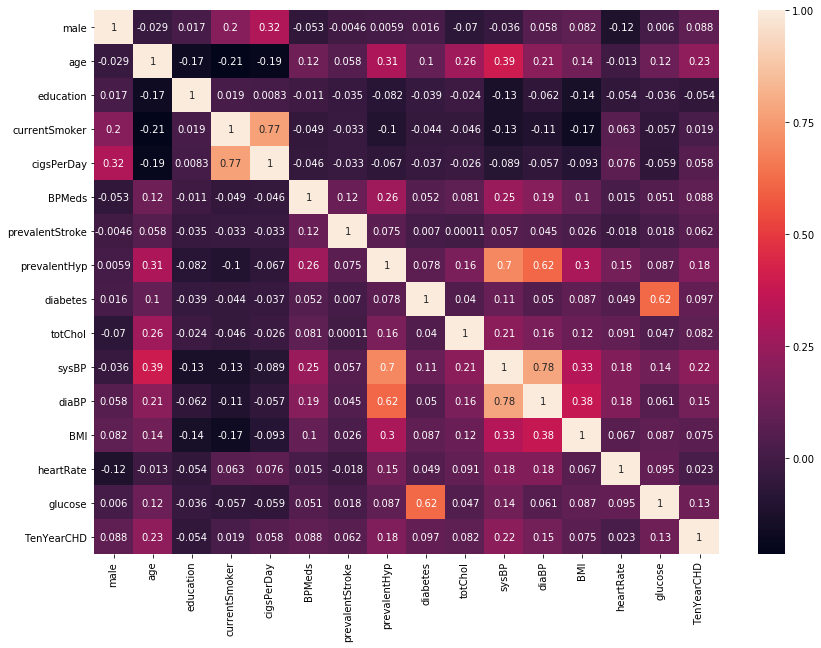

In [109]:
plt.figure(figsize=(14,10))

# create a heatmap of correlation matrix
correlation_matrix = data.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [112]:
data3 = data[['male', 'cigsPerDay', 'sysBP','TenYearCHD']]

In [113]:
data3['cigsPerDay'].fillna((data3['cigsPerDay'].mean()), inplace=True)

C:\Users\Aspire\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data3.values, i) for i in range(data3.shape[1])]
vif["features"] = data3.columns
print(vif)

   VIF Factor    features
0    1.927986        male
1    1.716679  cigsPerDay
2    2.067777       sysBP
3    1.217397  TenYearCHD


In [115]:
data3_IV = data3[['male','cigsPerDay','sysBP']]
data3_DV = data3['TenYearCHD']

In [116]:
data3_DV.isnull().sum()

0

In [117]:
from sklearn.model_selection import train_test_split
x_train_dup11,x_test_dup11,y_train_dup11,y_test_dup11=train_test_split(data3_IV,data3_DV,test_size=.20,random_state=1)

In [118]:
x_train_dup11 = x_train_dup11.reset_index(drop=True) 
y_train_dup11 = y_train_dup11.reset_index(drop=True) 

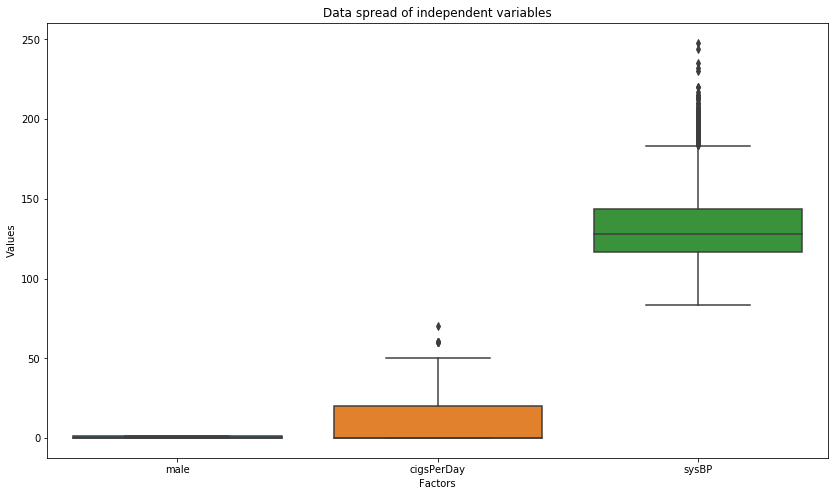

In [119]:
plt.figure(figsize=(14,8))
data4=pd.melt(x_train_dup11,var_name='factors',value_name='values')
p=sns.boxplot(x='factors',y='values',data=data4)
p.set(xlabel ='Factors',ylabel='Values',title ='Data spread of independent variables')

plt.show()

In [120]:
IV = x_train_dup11.describe()
IV = IV.reset_index(drop=True)
#print(IV.head())
#z1 = z['medv']
limIV = len(x_train_dup11)
#print(limIV)
#lim=len(x_train)
#data3=data3.reset_index(drop=True)
for i in range(0,len(x_train_dup11.columns)):
    twenty_five=IV.iloc[4][i]
    seventy_five=IV.iloc[6][i]
    iqr=seventy_five-twenty_five
    max_r=seventy_five+1.5*iqr
    min_r=twenty_five-1.5*iqr
    for j in range(0,limIV):
        #print(x_train.iloc[i,j])
        if x_train_dup11.iloc[j,i]>max_r:
            x_train_dup11.iloc[j,i]=max_r
        if x_train_dup11.iloc[j,i]<min_r:
            x_train_dup11.iloc[j,i]=min_r

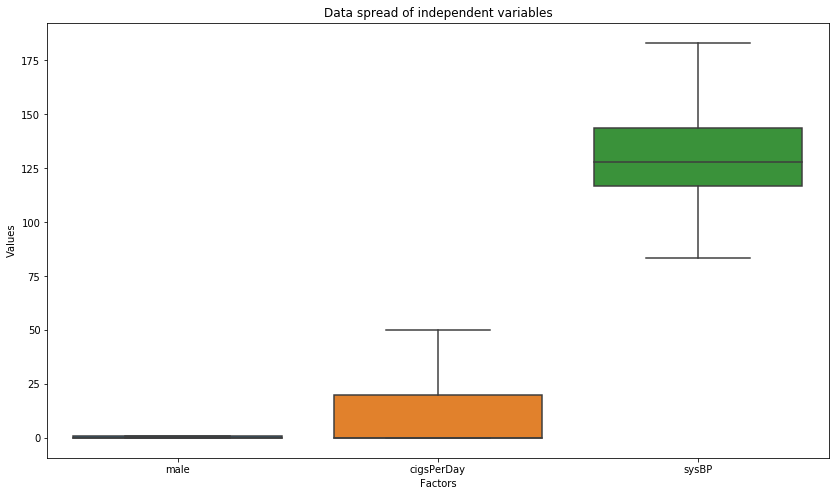

In [121]:
plt.figure(figsize=(14,8))
data5=pd.melt(x_train_dup11,var_name='factors',value_name='values')
p=sns.boxplot(x='factors',y='values',data=data5)
p.set(xlabel ='Factors',ylabel='Values',title ='Data spread of independent variables')

plt.show()

In [122]:
x_train_dup11 = add_constant(x_train_dup11)
model11=sm.Logit(y_train_dup11,x_train_dup11,)
result11=model11.fit()
result11.summary()

Optimization terminated successfully.
         Current function value: 0.395981
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3388
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.06907
Time:                        19:24:27   Log-Likelihood:                -1343.2
converged:                       True   LL-Null:                       -1442.8
                                        LLR p-value:                 5.983e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0013      0.337    -17.814      0.000      -6.662      -5.341
male           0.5713      0.105      5.421      0.000       0.365       0.778
cigsPerDay     0.0129      0.004      3.142      0.002       0.005       0.021
sysBP          0.0286      0.002     12.478      0.000       0.024       0.033
==============================================================================
"""

In [123]:
params = np.exp(result11.params)
# lower and upper limit of CI
conf = np.exp(result11.conf_int())
conf['OddsRatio'] = params
pvalue=round(result11.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.001279       0.004791    0.002475   0.000
male            1.440108       2.176649    1.770483   0.000
cigsPerDay      1.004854       1.021123    1.012956   0.002
sysBP           1.024381       1.033619    1.028989   0.000


In [124]:
x_test_dup11 = add_constant(x_test_dup11)
y_pred11=result11.predict(x_test_dup11)
y_pred11.head()
y_pred11=pd.Series(np.where(y_pred11 < 0.5, 0, 1))
sklearn.metrics.accuracy_score(y_test_dup11,y_pred11)

0.8455188679245284

In [125]:
#confusion matrix

In [126]:
cm=confusion_matrix(y_test_dup11,y_pred11)

In [127]:
print(cm)

[[714   4]
 [127   3]]


In [132]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train_dup11,y_train_dup11)
y_pred_1=logreg.predict(x_test_dup11)

In [133]:
y_pred_prob=logreg.predict_proba(x_test_dup11)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.785572,0.214428
1,0.847283,0.152717
2,0.731489,0.268511
3,0.840313,0.159687
4,0.906070,0.093930


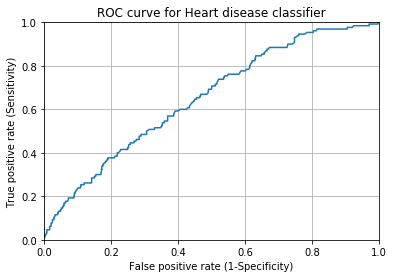

In [134]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_dup11, y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [135]:
#performing knn

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
import matplotlib.pyplot as plt

In [138]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [143]:
from sklearn.model_selection import train_test_split
x_train_dup,x_test_dup,y_train_dup,y_test_dup=train_test_split(X_dup,Y_dup,test_size=.20,random_state=1)

In [144]:
KNN_classifier.fit(x_train_dup,y_train_dup)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [145]:
prediction = KNN_classifier.predict(x_test_dup)

In [146]:
cm1 = confusion_matrix(y_test_dup,prediction)

In [147]:
print(cm)

[[714   4]
 [127   3]]


In [148]:
accuracy_score = accuracy_score(y_test_dup,prediction)

In [149]:
print(accuracy_score)

0.8290094339622641


In [150]:
print('misclassified samples:%d'%(y_test_dup != prediction).sum())

misclassified samples:145


In [151]:
misclassified_sample = []
for i in  range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_dup,y_train_dup)
    pred_i = knn.predict(x_test_dup)
    misclassified_sample.append((y_test_dup != pred_i).sum())
print(misclassified_sample)

[186, 140, 155, 131, 145, 133, 140, 130, 132, 131, 129, 127, 128, 129, 128, 130, 128, 129, 130]


In [ ]:
#for k = 12 we have less number of missclassification